In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
area = [24028585.551,24164366.684,14250785.8556,18629867.7953]
T_retorno=[2,5,10,20,50,100,150,200,500]
t_hrs=[24,18,14,12,6,3,2,1,0.5]
incidencia=[100,95,90,80,65,50,40,35,25]
#Datos para Caudales
c=0.13779
#lectura de datos
datos_pluvi='E:\Programas Hechos\Python\Proyectos Hidraulicos\HIDROLOGIA\data\precipitacion_anual.xlsx'
e1= pd.read_excel(datos_pluvi, sheet_name='Hoja1')

e1.head(10)

,AÑO,E - B,E - 1,E - 2,E - 4
0,1992,1264.5,994.0,1316,1160.8
1,1993,1453.5,1069.3,----,1570.8
2,1994,1060.4,833.1,1217.5,1274.5
3,1995,925.8,692.2,1325.7,----
4,1996,1457.6,----,1328.8,1150.1
5,1997,1204.9,----,----,----
6,1998,656.5,829.3,1378.5,818.3
7,1999,1222.4,876.9,1456.9,1528.6
8,2000,922.4,818.5,----,1327.7
9,2001,1484.6,905.8,----,1456.0


In [3]:
#conversion de los datos a flotantes
df = pd.DataFrame(e1,columns=list(e1))
#nombre de columnas
columnas=list(e1)
for i in columnas:
    df[i]= df[i].replace('----',np.nan)
    df[i]=pd.to_numeric(df[i], downcast='float')

#numero de datos
cant_de_filas = df.shape[0]

In [4]:
# minimos cuadrados
def minCuadrados(x, y):
    n = len(x)
    x_2 = x**2
    y_2 = y**2
    xy = x*y
    sx = x.sum()
    sy = y.sum()
    sx_2 = x_2.sum()
    sy_2 = y_2.sum()
    sxy = xy.sum()
    # constante
    B = (n*sxy-sx*sy)/(n*sx_2-sx**2)
    A = (sy-B*sx)/n
    ecuacion = f'Y = {round(A,4)}+{round(B,4)}*X'
    #correccion
    YCorr=A+B*x
    #print(ecuacion)
    # print(sx,sy,sx_2,sy_2,sxy)
    return x_2, y_2, xy,A,B,YCorr,ecuacion

In [5]:

# Metodo de Dobles acumulados
TablasDoblesAcum = []
Ecuaciones=[]
list_a=[]
list_b=[]

#iteracion limpiados de celdas nulas
for i in range(2, len(columnas)):
    estacion = columnas[i]
    valor = df[df[estacion].notna()]
    periodos = np.array(valor[columnas[0]])
    precEB = np.array(valor[columnas[1]])
    precSelect = np.array(valor[estacion])
    # datos para min cuadrados
    x, y, xy, const_A, const_B,precCorr, ecuacion = minCuadrados(precEB, precSelect)
    #Ecuaciones
    list_a.append(const_A)
    list_b.append(const_B)
    Ecuaciones.append(ecuacion)
    print(f'{estacion}: {ecuacion}')
    # tablas de dobles acumulados
    valoresTable = list(zip(periodos, precEB, precSelect, x, y, xy,precCorr))
    tabla = pd.DataFrame(valoresTable, columns=[
                         'AÑO', 'E - B', estacion, 'x_2', 'y_2', 'xy',f'{estacion} Corr.'])
    TablasDoblesAcum.append(tabla)




E - 1: Y = 553.5115+0.2868*X
E - 2: Y = 1346.6325+-0.0086*X
E - 4: Y = 481.7974+0.6641*X


In [6]:
# calculo de acumulados
# def doblesAcum(TablasDoblesAcum, columnas, col):
eb = columnas[1]
col = 'corr'
for i in range(0, len(TablasDoblesAcum)):
    if col == 'norm':
        columEstacion = columnas[2+i]
    elif col == 'corr':
        columEstacion = f'{columnas[2+i]} Corr.'
    TablasDoblesAcum[i]['E- B acum'] = TablasDoblesAcum[i][eb].cumsum()
    TablasDoblesAcum[i][f'{columnas[2+i]} acum'] = TablasDoblesAcum[i][
        columEstacion].cumsum()
TablasDoblesAcum

# norm= valores sin corregir y corr= para valores corregidos por minimos cuadrados

#TablasDoblesAcum=doblesAcum(TablasDoblesAcum, columnas,col='corr')


[      AÑO        E - B        E - 1           x_2           y_2            xy  \
 0  1992.0  1264.500000   994.000000  1.598960e+06  9.880360e+05  1.256913e+06   
 1  1993.0  1453.500000  1069.300049  2.112662e+06  1.143403e+06  1.554228e+06   
 2  1994.0  1060.400024   833.099976  1.124448e+06  6.940556e+05  8.834192e+05   
 3  1995.0   925.799988   692.200012  8.571056e+05  4.791408e+05  6.408388e+05   
 4  1998.0   656.500000   829.299988  4.309922e+05  6.877385e+05  5.444354e+05   
 5  1999.0  1222.400024   876.900024  1.494262e+06  7.689536e+05  1.071923e+06   
 6  2000.0   922.400024   818.500000  8.508218e+05  6.699422e+05  7.549844e+05   
 7  2001.0  1484.599976   905.799988  2.204037e+06  8.204736e+05  1.344751e+06   
 8  2004.0  1127.800049   864.400024  1.271933e+06  7.471874e+05  9.748704e+05   
 
    E - 1 Corr.     E- B acum   E - 1 acum  
 0   916.180481   1264.500000   916.180481  
 1   970.387207   2718.000000  1886.567688  
 2   857.642944   3778.400024  2744.210632 

In [7]:
#Graficas E_B vs Estacion
def graficaAcum(TablasD,columnas):

    for i in range(0,len(TablasD)):
        eb=list(TablasD[i]['E- B acum'])
        ei=list(TablasD[i][f'{columnas[2+i]} acum'])
    #Grafica
        plt.plot(eb, ei, label=i, ls='-')
    #v = [0, 60, 0, 400]
    #plt.axis(v)
        plt.title(f'E-B vs. {columnas[2+i]}', color='#00008B')
        plt.xlabel('E-B')
        plt.ylabel(f'{columnas[2+i]}')
        plt.grid(b=True, which='major', color='#666666', linestyle='--')
        plt.legend(loc=4)
        plt.show()



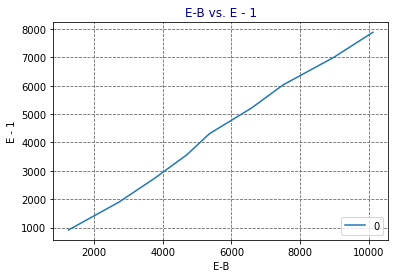

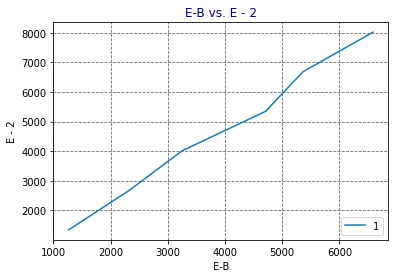

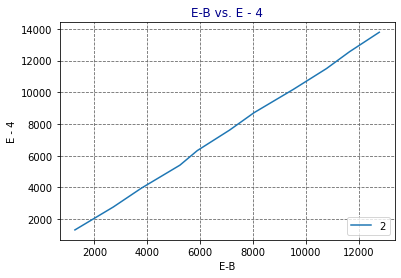

In [8]:
graficaAcum(TablasDoblesAcum,columnas)


In [9]:
# todos los periodos
per_anuales = np.array(df[columnas[0]])
todos_EB = np.array(df[columnas[1]])
#MetodoPromedioAritmetico
tabla_general = list(zip(per_anuales, todos_EB))
df_promAritmetico = pd.DataFrame(tabla_general , columns=['AÑO', 'E - B'])
for i in range(0, len(list_a)):
    A = list_a[i]
    B = list_b[i]
    Preci_Por_Estacion = A+B*todos_EB
    df_promAritmetico[columnas[i+2]]=Preci_Por_Estacion

df_promAritmetico['Promedio'] = df_promAritmetico.drop(['AÑO'], axis=1).mean(axis=1)
df_resumen_P=df_promAritmetico

In [10]:

#precipitacion por multiplicad
df_area_x_ptabla = pd.DataFrame()
list_pA=[]
#pmax
for i in range (0,len(area)):
    area_x_Pre=df_resumen_P.iloc[:, i+1]*area[i]
    df_resumen_P[f'{columnas[i+1]}*A']=area_x_Pre
    #nueva tabla para multiplicar valores
    lista_aXP= list(zip(area_x_Pre))

    df_area_x_ptabla[f'{i}']=area_x_Pre
area_total=sum(area)
pmax=df_area_x_ptabla.sum(axis=1)/area_total
df_resumen_P['Pmax']=pmax
#df_resumen_P['Pmax']=df_area_x_ptabla.cumsum()
df_resumen_P

,AÑO,E - B,E - 1,E - 2,E - 4,Promedio,E - B*A,E - 1*A,E - 2*A,E - 4*A,Pmax
0,1992.0,1264.500000,916.180481,1335.806641,1321.610107,1209.524307,3.038415e+10,2.213892e+10,1.903630e+10,2.462142e+10,1186.339057
1,1993.0,1453.500000,970.387207,1334.188599,1447.133667,1301.302368,3.492555e+10,2.344879e+10,1.901324e+10,2.695991e+10,1287.070984
2,1994.0,1060.400024,857.642944,1337.554077,1186.057861,1110.413727,2.547991e+10,2.072440e+10,1.906120e+10,2.209610e+10,1077.559188
3,1995.0,925.799988,819.038574,1338.706421,1096.663818,1045.052200,2.224566e+10,1.979155e+10,1.907762e+10,2.043070e+10,1005.820995
4,1996.0,1457.599976,971.563110,1334.153564,1449.856689,1303.293335,3.502407e+10,2.347721e+10,1.901274e+10,2.701064e+10,1289.256182
5,1997.0,1204.900024,899.086731,1336.316895,1282.026978,1180.582657,2.895204e+10,2.172586e+10,1.904357e+10,2.388399e+10,1154.573807
6,1998.0,656.500000,741.801147,1341.011963,917.809326,914.280609,1.577477e+10,1.792515e+10,1.911047e+10,1.709867e+10,862.291262
7,1999.0,1222.400024,904.105835,1336.167114,1293.649536,1189.080627,2.937254e+10,2.184714e+10,1.904143e+10,2.410052e+10,1163.900859
8,2000.0,922.400024,818.063416,1338.735474,1094.405762,1043.401169,2.216397e+10,1.976798e+10,1.907803e+10,2.038863e+10,1004.008878
9,2001.0,1484.599976,979.307007,1333.922363,1467.788574,1316.404480,3.567284e+10,2.366433e+10,1.900944e+10,2.734471e+10,1303.646465


In [11]:

#Creamos una nueva tablas
num_total_de_datos=cant_de_filas+1
orden=np.arange(1,num_total_de_datos)
valores= list(zip(orden,list(df_resumen_P['AÑO']),list(df_resumen_P['Pmax'])))
df_pmax24=pd.DataFrame(valores,columns=['Orden','AÑO','Pmax'])
#anadimos el ascendente
a=np.array(df_pmax24['Pmax'])
prom_P=a.mean()
df_pmax24['>P<']=np.sort(a)[::-1]
df_pmax24['F(x)']=(2*df_pmax24['Orden']-1)/(2*cant_de_filas)
df_pmax24['(xi-X)**2']=(df_pmax24['>P<']-prom_P)**2
df_pmax24

,Orden,AÑO,Pmax,>P<,F(x),(xi-X)**2
0,1,1992.0,1186.339057,1303.646465,0.038462,32430.058198
1,2,1993.0,1287.070984,1289.256182,0.115385,27454.234228
2,3,1994.0,1077.559188,1287.070984,0.192308,26734.864528
3,4,1995.0,1005.820995,1186.339057,0.269231,3940.834690
4,5,1996.0,1289.256182,1183.567635,0.346154,3600.557530
5,6,1997.0,1154.573807,1163.900859,0.423077,1627.143714
6,7,1998.0,862.291262,1154.573807,0.500000,961.670839
7,8,1999.0,1163.900859,1113.481632,0.576923,101.633753
8,9,2000.0,1004.008878,1077.559188,0.653846,2116.349679
9,10,2001.0,1303.646465,1005.820995,0.730769,13863.177210


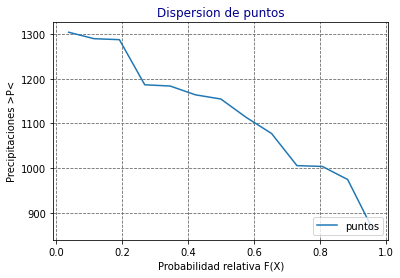

In [12]:
preci=list(df_pmax24['F(x)'])
prob=list(df_pmax24['>P<'])
#Grafica
plt.plot(preci, prob, label="puntos", ls='-')
#v = [0, 60, 0, 400]
#plt.axis(v)
plt.title(f'Dispersion de puntos', color='#00008B')
plt.xlabel('Probabilidad relativa F(X)')
plt.ylabel(f'Precipitaciones >P<')
plt.grid(b=True, which='major', color='#666668', linestyle='--')
plt.legend(loc=4)
plt.show()

In [13]:
#calculo de las correcciones
sum_x_X=df_pmax24['(xi-X)**2'].sum()
fi=((sum_x_X)/(cant_de_filas-1))**0.5
beta=prom_P-0.57721*fi
alfa=fi*((6)**0.5)/np.pi
#creamos la columna
df_pmax24['Prec. Corr']=beta-alfa*np.log(-np.log(df_pmax24['F(x)']))
df_pmax24
#print(fi,beta,alfa)

,Orden,AÑO,Pmax,>P<,F(x),(xi-X)**2,Prec. Corr
0,1,1992.0,1186.339057,1303.646465,0.038462,32430.058198,921.861602
1,2,1993.0,1287.070984,1289.256182,0.115385,27454.234228,965.034597
2,3,1994.0,1077.559188,1287.070984,0.192308,26734.864528,993.367823
3,4,1995.0,1005.820995,1186.339057,0.269231,3940.834690,1017.329921
4,5,1996.0,1289.256182,1183.567635,0.346154,3600.557530,1039.647741
5,6,1997.0,1154.573807,1163.900859,0.423077,1627.143714,1061.658669
6,7,1998.0,862.291262,1154.573807,0.500000,961.670839,1084.325051
7,8,1999.0,1163.900859,1113.481632,0.576923,101.633753,1108.599191
8,9,2000.0,1004.008878,1077.559188,0.653846,2116.349679,1135.702209
9,10,2001.0,1303.646465,1005.820995,0.730769,13863.177210,1167.563090


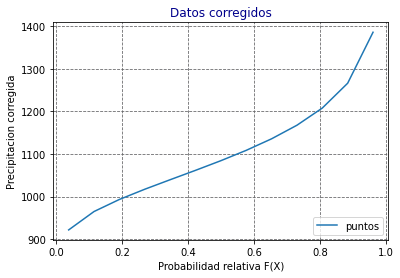

In [14]:
preci=list(df_pmax24['F(x)'])
prob=list(df_pmax24['Prec. Corr'])
#Grafica
plt.plot(preci, prob, label="puntos", ls='-')
#v = [0, 60, 0, 400]
#plt.axis(v)
plt.title(f'Datos corregidos', color='#00008B')
plt.xlabel('Probabilidad relativa F(X)')
plt.ylabel(f'Precipitacion corregida')
plt.grid(b=True, which='major', color='#666668', linestyle='--')
plt.legend(loc=4)
plt.show()

In [15]:
#correccion por minimos cuadrados
x, y, xy, const_A, const_B,precCorr, ecuacion=minCuadrados(np.array(preci),np.array(prob))
print(f'La ecuacion corregida es: {ecuacion}')
#creamos la tabla de pmax con periodos de retorno
valores= list(zip(T_retorno))
df_pmax_T=pd.DataFrame(valores,columns=['T [AÑOS]'])
df_pmax_T['f(x)']=1-1/df_pmax_T['T [AÑOS]']
df_pmax_T['Pmax 24hrs (mm)']=const_A+const_B*df_pmax_T['f(x)']
#intensidades maximas
df_imax= pd.DataFrame(valores,columns=['T [AÑOS]'])
df_imax['I 24hrs (mm/hr)']=df_pmax_T['Pmax 24hrs (mm)']/t_hrs[0]
df_pmax_T

La ecuacion corregida es: Y = 895.7544+416.9499*X


,T [AÑOS],f(x),Pmax 24hrs (mm)
0,2,0.500000,1104.229321
1,5,0.800000,1229.314298
2,10,0.900000,1271.009291
3,20,0.950000,1291.856787
4,50,0.980000,1304.365285
5,100,0.990000,1308.534784
6,150,0.993333,1309.924617
7,200,0.995000,1310.619534
8,500,0.998000,1311.870384


In [16]:

#Calculos de la precipitaciones maxiamas con incidencias


for i in range(1,len(incidencia)):
    inc=incidencia[i]
    pmax_H=inc*df_pmax_T['Pmax 24hrs (mm)']/100
    df_pmax_T[f'Pmax {t_hrs[i]}hrs (mm)']=pmax_H
    df_imax[f'I {t_hrs[i]}hrs (mm/hr)']=pmax_H/t_hrs[i]
df_pmax_T


,T [AÑOS],f(x),Pmax 24hrs (mm),Pmax 18hrs (mm),Pmax 14hrs (mm),Pmax 12hrs (mm),Pmax 6hrs (mm),Pmax 3hrs (mm),Pmax 2hrs (mm),Pmax 1hrs (mm),Pmax 0.5hrs (mm)
0,2,0.500000,1104.229321,1049.017855,993.806389,883.383457,717.749058,552.114660,441.691728,386.480262,276.057330
1,5,0.800000,1229.314298,1167.848583,1106.382868,983.451439,799.054294,614.657149,491.725719,430.260004,307.328575
2,10,0.900000,1271.009291,1207.458826,1143.908362,1016.807433,826.156039,635.504645,508.403716,444.853252,317.752323
3,20,0.950000,1291.856787,1227.263948,1162.671108,1033.485430,839.706912,645.928394,516.742715,452.149875,322.964197
4,50,0.980000,1304.365285,1239.147021,1173.928756,1043.492228,847.837435,652.182642,521.746114,456.527850,326.091321
5,100,0.990000,1308.534784,1243.108045,1177.681306,1046.827827,850.547610,654.267392,523.413914,457.987174,327.133696
6,150,0.993333,1309.924617,1244.428386,1178.932156,1047.939694,851.451001,654.962309,523.969847,458.473616,327.481154
7,200,0.995000,1310.619534,1245.088557,1179.557580,1048.495627,851.902697,655.309767,524.247814,458.716837,327.654883
8,500,0.998000,1311.870384,1246.276864,1180.683345,1049.496307,852.715749,655.935192,524.748153,459.154634,327.967596


In [17]:
df_imax

,T [AÑOS],I 24hrs (mm/hr),I 18hrs (mm/hr),I 14hrs (mm/hr),I 12hrs (mm/hr),I 6hrs (mm/hr),I 3hrs (mm/hr),I 2hrs (mm/hr),I 1hrs (mm/hr),I 0.5hrs (mm/hr)
0,2,46.009555,58.278770,70.986171,73.615288,119.624843,184.038220,220.845864,386.480262,552.114660
1,5,51.221429,64.880477,79.027348,81.954287,133.175716,204.885716,245.862860,430.260004,614.657149
2,10,52.958720,67.081046,81.707740,84.733953,137.692673,211.834882,254.201858,444.853252,635.504645
3,20,53.827366,68.181330,83.047936,86.123786,139.951152,215.309465,258.371357,452.149875,645.928394
4,50,54.348554,68.841501,83.852054,86.957686,141.306239,217.394214,260.873057,456.527850,652.182642
5,100,54.522283,69.061558,84.120093,87.235652,141.757935,218.089131,261.706957,457.987174,654.267392
6,150,54.580192,69.134910,84.209440,87.328308,141.908500,218.320770,261.984923,458.473616,654.962309
7,200,54.609147,69.171587,84.254113,87.374636,141.983783,218.436589,262.123907,458.716837,655.309767
8,500,54.661266,69.237604,84.334525,87.458026,142.119292,218.645064,262.374077,459.154634,655.935192


In [18]:

#df_imax_T=df_imax.sort_values(by='I 24hrs (mm/hr)',axis=0,ascending=False).transpose()
df_imax_T=df_imax.transpose().drop(['T [AÑOS]'],axis=0)
#para colocar encabezado

df_imax_T

,0,1,2,3,4,5,6,7,8
I 24hrs (mm/hr),46.009555,51.221429,52.958720,53.827366,54.348554,54.522283,54.580192,54.609147,54.661266
I 18hrs (mm/hr),58.278770,64.880477,67.081046,68.181330,68.841501,69.061558,69.134910,69.171587,69.237604
I 14hrs (mm/hr),70.986171,79.027348,81.707740,83.047936,83.852054,84.120093,84.209440,84.254113,84.334525
I 12hrs (mm/hr),73.615288,81.954287,84.733953,86.123786,86.957686,87.235652,87.328308,87.374636,87.458026
I 6hrs (mm/hr),119.624843,133.175716,137.692673,139.951152,141.306239,141.757935,141.908500,141.983783,142.119292
I 3hrs (mm/hr),184.038220,204.885716,211.834882,215.309465,217.394214,218.089131,218.320770,218.436589,218.645064
I 2hrs (mm/hr),220.845864,245.862860,254.201858,258.371357,260.873057,261.706957,261.984923,262.123907,262.374077
I 1hrs (mm/hr),386.480262,430.260004,444.853252,452.149875,456.527850,457.987174,458.473616,458.716837,459.154634
I 0.5hrs (mm/hr),552.114660,614.657149,635.504645,645.928394,652.182642,654.267392,654.962309,655.309767,655.935192


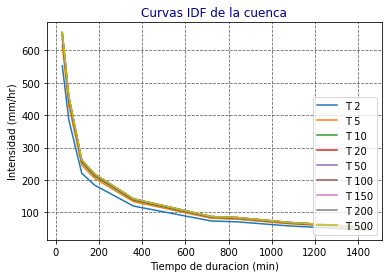

In [19]:
b=np.array(df_imax_T[0])
duracion_en_minutos=np.array(t_hrs)*60
#curva de intensidades
intensidades_finales=list(df_imax_T)
#intensidades_finales.remove('Tiempo de duracion (min)')
for i in intensidades_finales:
    plt.plot(duracion_en_minutos,df_imax_T[i], label=f'T {T_retorno[i]}', ls='-')
#v = [0, 60, 0, 400]
#plt.axis(v)
plt.title('Curvas IDF de la cuenca', color='#00008B')
plt.xlabel('Tiempo de duracion (min)')
plt.ylabel('Intensidad (mm/hr)')
plt.grid(b=True, which='major', color='#666666', linestyle='--')
plt.legend(loc=4)
plt.show()

In [20]:
encabezado_idf=[]
for j in T_retorno:
    encabezado_idf.append(f"CAUDAL (m3/s) - AÑO: {j}")
df_imax_T.columns=encabezado_idf
#caudales
area_total=sum(area)/10000
area_total
caudales=round(df_imax_T*c*area_total/360,3)
caudales

,CAUDAL (m3/s) - AÑO: 2,CAUDAL (m3/s) - AÑO: 5,CAUDAL (m3/s) - AÑO: 10,CAUDAL (m3/s) - AÑO: 20,CAUDAL (m3/s) - AÑO: 50,CAUDAL (m3/s) - AÑO: 100,CAUDAL (m3/s) - AÑO: 150,CAUDAL (m3/s) - AÑO: 200,CAUDAL (m3/s) - AÑO: 500
I 24hrs (mm/hr),518.078,576.765,596.327,606.108,611.977,613.933,614.585,614.911,615.498
I 18hrs (mm/hr),656.232,730.569,755.348,767.737,775.171,777.649,778.475,778.887,779.631
I 14hrs (mm/hr),799.320,889.866,920.047,935.138,944.193,947.211,948.217,948.720,949.626
I 12hrs (mm/hr),828.925,922.824,954.123,969.773,979.163,982.293,983.336,983.858,984.797
I 6hrs (mm/hr),1347.002,1499.588,1550.450,1575.881,1591.140,1596.226,1597.921,1598.769,1600.295
I 3hrs (mm/hr),2072.311,2307.059,2385.308,2424.433,2447.907,2455.732,2458.341,2459.645,2461.992
I 2hrs (mm/hr),2486.774,2768.471,2862.370,2909.319,2937.489,2946.879,2950.009,2951.574,2954.391
I 1hrs (mm/hr),4351.854,4844.824,5009.147,5091.308,5140.605,5157.038,5162.515,5165.254,5170.184
I 0.5hrs (mm/hr),6216.934,6921.177,7155.924,7273.298,7343.722,7367.197,7375.022,7378.934,7385.977


In [43]:
S=81.07277
L=19.6914321
H=1200

k0=5158.24112113
k1=0.0253818990749
k2=0.63772875889

T_retorno_elegido=100
tc=60*(4*S**0.5+1.5*L)/(0.8*H**0.5)
Intensidad_calc=(k0*T_retorno_elegido**k1)/tc**k2
caudal_cal=0.278*c*Intensidad_calc*S
caudal_cal
print(f"""
      Tiempo de concentracion : {round(tc,3)} min
      Calculo de la intensidad: {round(Intensidad_calc,3)} mm/hr
      Caudal de la cuenca     : {round(caudal_cal*1000,3)} lt/s""")


      Tiempo de concentracion : 141.927 min
      Calculo de la intensidad: 245.941 mm/hr
      Caudal de la cuenca     : 763781.281 lt/s
